In [3]:
import keras
from keras.datasets import mnist
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [4]:
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)
model.load_weights("weights.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

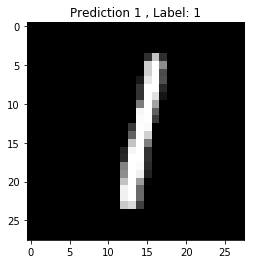

In [13]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction %d , Label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

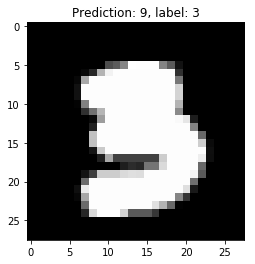

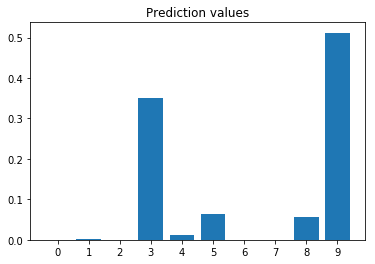

In [18]:
# Error Analysis
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()

In [19]:
total = 0.0
misclassified = 0.0
for i in range(10000):
    total += 1
    if most_likely[i] != y_test[i]:
        misclassified += 1
print('Error rate: %.2f %%' % (100.0*misclassified/total))

Error rate: 1.58 %
